# import library and datasets 

In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [39]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [40]:
X_train.shape

(50000, 32, 32, 3)

In [41]:
X_test.shape

(10000, 32, 32, 3)

In [42]:
y_train.shape

(50000, 1)

In [43]:
y_test.shape

(10000, 1)

# data visualization


[6]


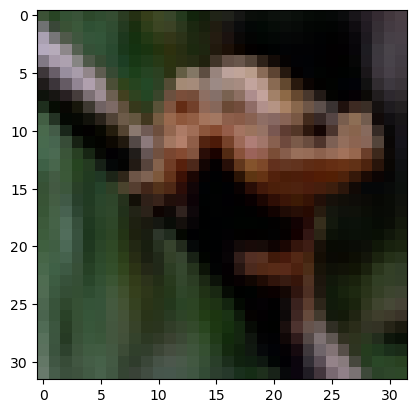

In [44]:
i = 5000

plt.imshow(X_train[i])
print(y_train[i])

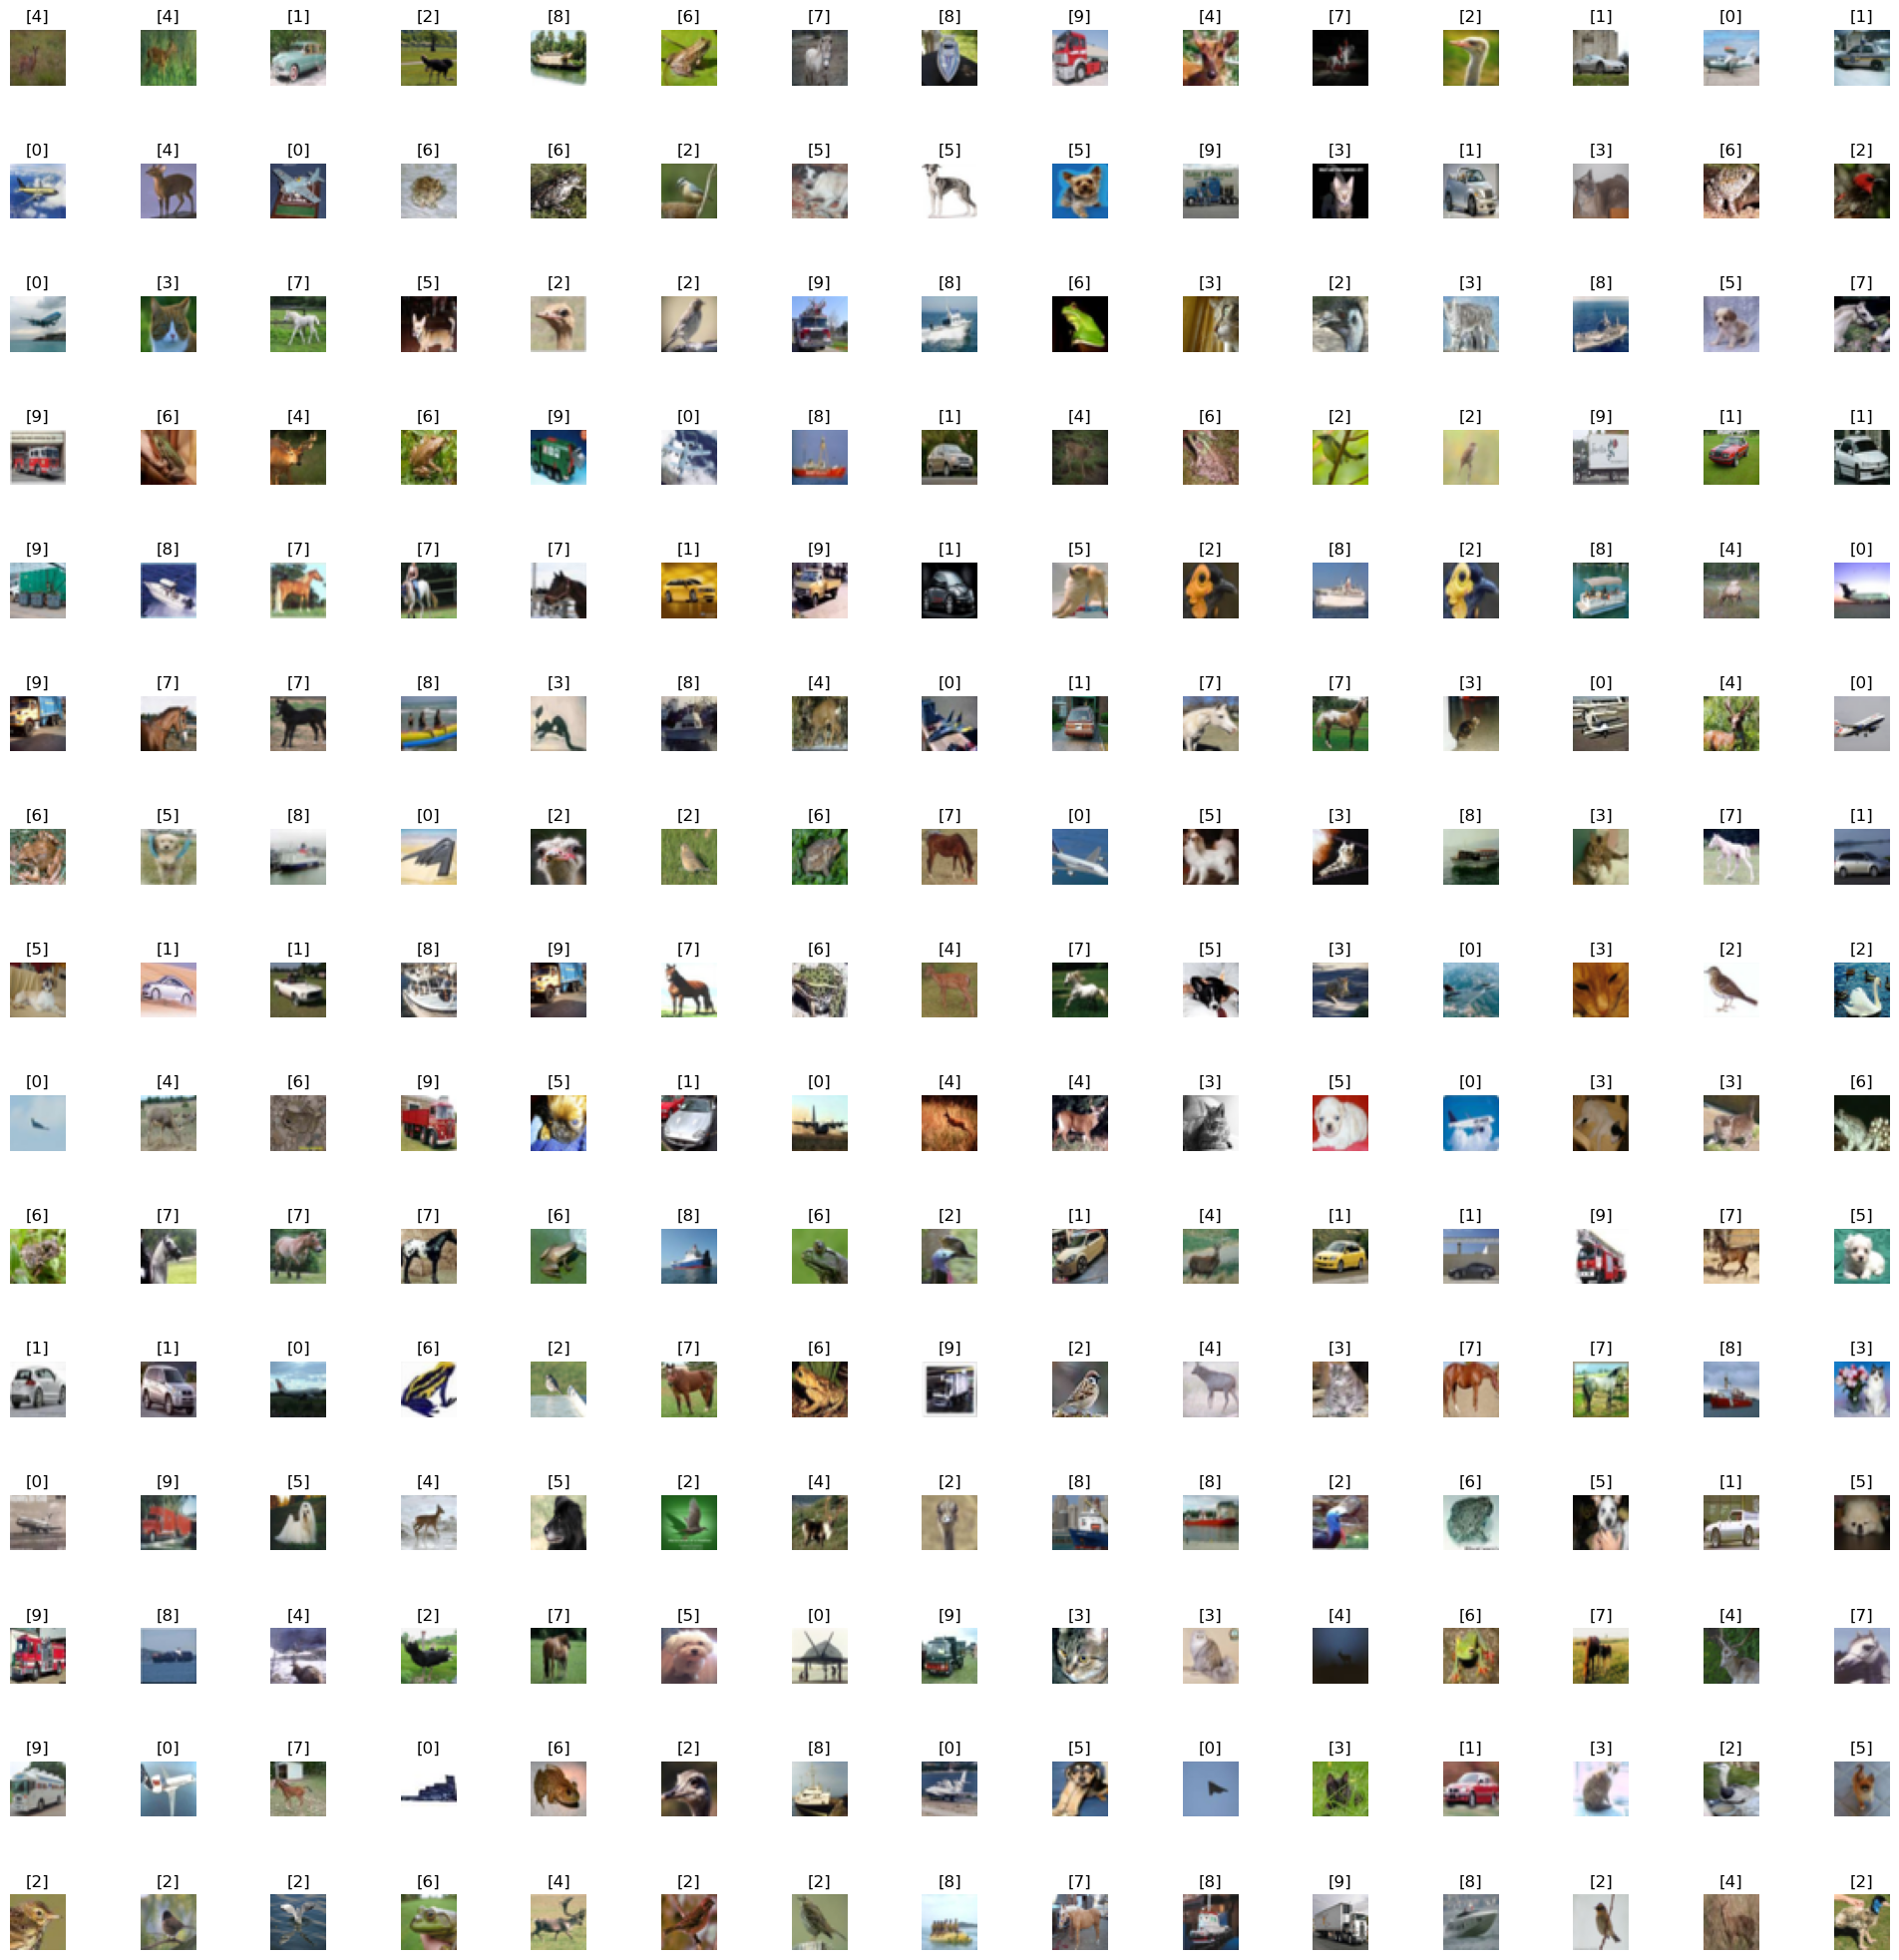

In [45]:
w_grid = 15 
l_grid = 15 
fig,axes = plt.subplots(l_grid,w_grid ,figsize =(25,25))
axes = axes.ravel()
n_training= len(X_train)
for i in np.arange(0,l_grid*w_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace=1.4)

In [46]:
n_training

50000

# data preparation

In [47]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [48]:
number_cat = 10 

In [49]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [50]:
import keras
y_train = keras.utils.to_categorical(y_train,number_cat)

In [51]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [52]:
y_test = keras.utils.to_categorical(y_test,number_cat)

In [53]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [54]:
X_train = X_train/255
X_test = X_test/255

In [55]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [56]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [57]:
X_train.shape

(50000, 32, 32, 3)

In [58]:
Input_shape = X_train.shape[1:]

In [59]:
Input_shape

(32, 32, 3)

# model training

In [60]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [61]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64,
                     kernel_size =(3,3),
                     activation='relu',
                     input_shape =Input_shape ))
cnn_model.add(Conv2D(filters=64,
                     kernel_size =(3,3),
                     activation='relu'))
cnn_model.add(AveragePooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=128,
                     kernel_size =(3,3),
                     activation='relu'))
cnn_model.add(Conv2D(filters=128,
                     kernel_size =(3,3),
                     activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=1024,
                    activation='relu'))
cnn_model.add(Dense(units=1024,
                    activation='relu'))

cnn_model.add(Dense(units=10,
                    activation='softmax'))


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
cnn_model.compile(
                    loss ='categorical_crossentropy',
                  optimizer= keras.optimizers.RMSprop(learning_rate= 0.001),
                  metrics=['accuracy']
                  )

In [63]:
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=2,
                        shuffle=True)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1003s 641ms/step - accuracy: 0.3050 - loss: 1.8931
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 492s 315ms/step - accuracy: 0.5639 - loss: 1.2432


# Evaluating the model 

In [64]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy :{}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.6225 - loss: 1.1080
Test Accuracy :0.6207000017166138


In [65]:
predicted_class = np.argmax(cnn_model.predict(X_test), axis=-1)
predicted_class

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step


array([3, 1, 9, ..., 5, 4, 7])

In [66]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [67]:
y_test = y_test.argmax(1)

In [68]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

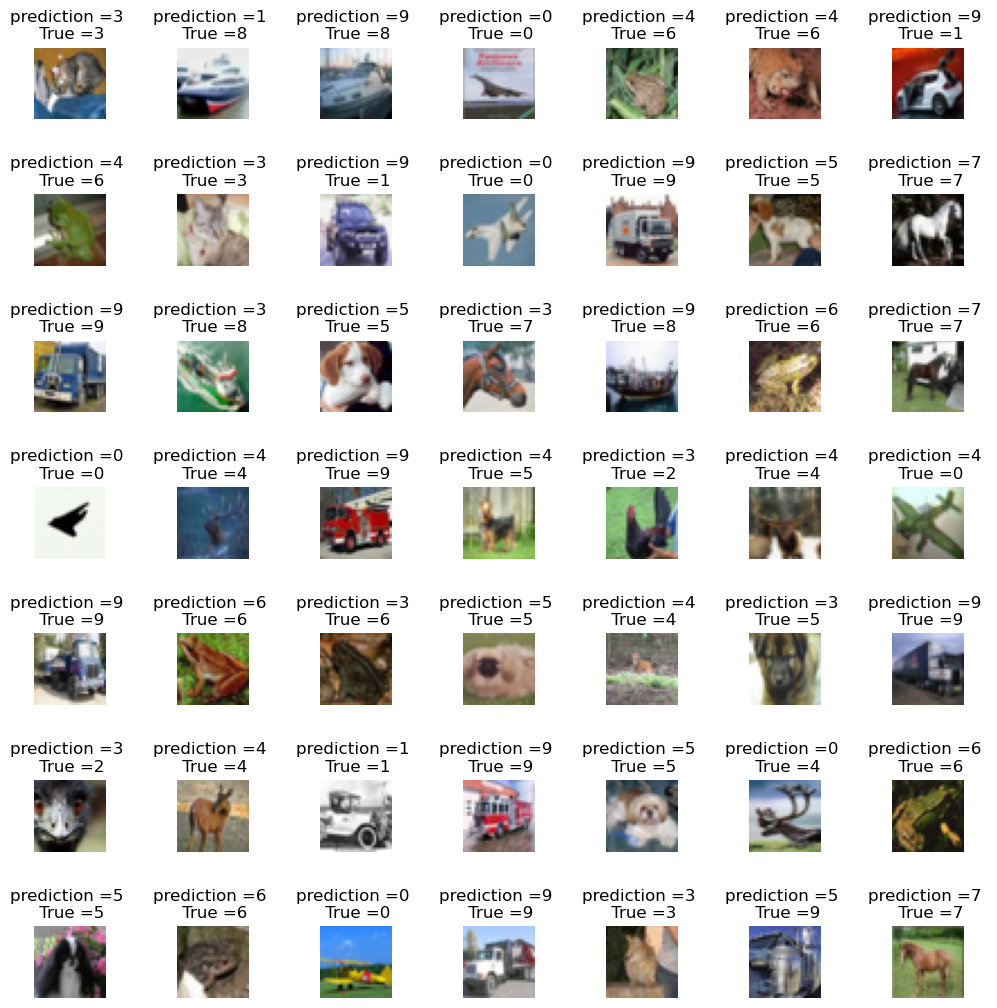

In [71]:
l = 7 
w = 7 
fig ,axes = plt.subplots(l,w,figsize = (12,13))
axes = axes.ravel()
for i in np.arange(0,l*w):
    axes[i].imshow(X_test[i])
    axes[i].set_title('prediction ={} \n True ={}'.format(predicted_class[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)

<Axes: >

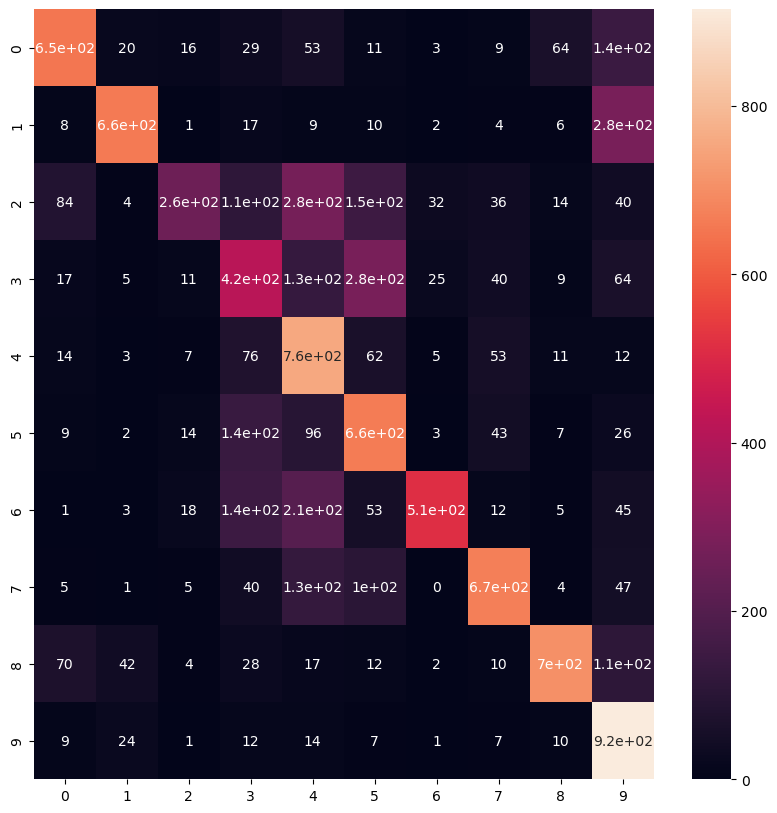

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_class)
cm
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)